# HW 03 - Association Rule Mining with Apriori Algorithm

1. Introduction
2. Data Pre-Processing
3. Association Rule Discovery (experimenting with support, confidence, and lift)
4. Rules with PEP on the RHS

# 1.Introduction

The task is to find interesting patterns in the dataset having a person’s demographics and banking information. The goal is to determine potential buyers of the new PEP (Personal Equity Plan). When the product was launched, the marketing department had sent a mail to its existing customers and recorded information on whether customers responded and bought the product.  

The data contains a number of the following fields:
```
+--------------+------------------------------------------------------------+
| id           | a unique identification number                             |
| age          | age of customer in years                                   |
| sex          | MALE / FEMALE                                              |
| region       | inner_city/rural/suburban/town                             |
| income       | income of customer                                         |
| married      | Is the customer married (YES/NO)                           |
| children     | number of children                                         |
| car          | Does the customer own a car (YES/NO)                       |
| save_acct    | Does the customer have a saving account (YES/NO)           |
| current_acct | Does the customer have a current account (YES/NO)          |
| mortgage     | Does the customer have a mortgage (YES/NO)                 |
| pep          | Did the customer buy a PEP after the last mailing (YES/NO) |
+--------------+------------------------------------------------------------+
```
Each record is a customer description where the "pep" field indicates whether or not that customer bought a PEP after the last mailing. 
Dataset is having 10 features related to demographics - ```‘age’, ‘sex’, ‘region’, ‘income’, ‘married’, ‘children’, ‘car’``` and financial information - ```‘save_acct’, ‘current_acct’, and ‘mortgage’```. We have a target variable ‘PEP’ which indicates whether the person bought the equity plan or not.


# 2. Data Pre-Processing

In [289]:
#importing required libraries

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


In [290]:
bankdf = pd.read_csv('bankdata_csv_all.csv')
bankdf.shape

(600, 12)

In [291]:
bankdf.head() # viewing first few rows to understand the data

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [292]:
bankdf.fillna(0) # # replacing NAs with zero

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,ID12699,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO


In [293]:
bankdf.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [294]:
bankdf.describe(include='object')


,id,sex,region,married,car,save_act,current_act,mortgage,pep
count,600,600,600,600,600,600,600,600,600
unique,600,2,4,2,2,2,2,2,2
top,ID12101,FEMALE,INNER_CITY,YES,NO,YES,YES,NO,NO
freq,1,300,269,396,304,414,455,391,326


Text(0.5, 1.0, 'Wether Customer Purchased PEP')

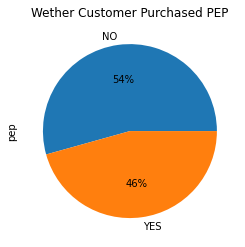

In [295]:
# distribution of PEP
bankdf['pep'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Wether Customer Purchased PEP')

Text(0.5, 1.0, 'Age Distibution')

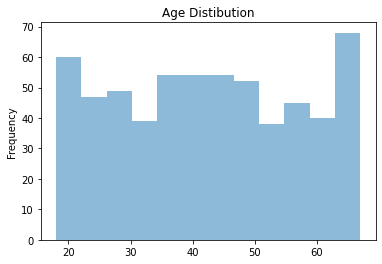

In [296]:
bankdf.age.plot.hist(bins=12, alpha=0.5)
plt.title('Age Distibution')

In [297]:
bankdf['age'].describe()

count    600.000000
mean      42.395000
std       14.424947
min       18.000000
25%       30.000000
50%       42.000000
75%       55.250000
max       67.000000
Name: age, dtype: float64

In [298]:
bankdf['age'] = pd.cut(x=bankdf['age'], bins=[0,19,29,39,49,59,69], labels=['Teenagers','Twenties','Thirties','Forties','Fifties','Sixties'])
# below 20 : teenagers
# 20 - 29 : twenties
# 30 - 39 : thirties
# 40 - 49 : fourties
# 50 - 59 : fifties
# 60 - 69 : sixties

Text(0.5, 1.0, 'Income Distibution')

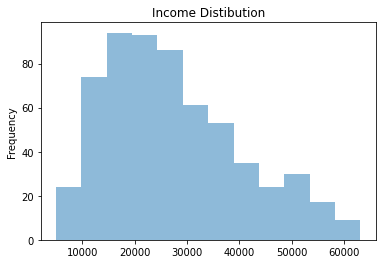

In [299]:
# income distibution

bankdf.income.plot.hist(bins=12, alpha=0.5)
plt.title('Income Distibution')

In [300]:
bankdf['income'].describe()

count      600.000000
mean     27524.031217
std      12899.468246
min       5014.210000
25%      17264.500000
50%      24925.300000
75%      36172.675000
max      63130.100000
Name: income, dtype: float64

In [301]:
bankdf['income'] = pd.qcut(bankdf['income'], 4, labels=['Very_Low','Low','Medium','High'])


Text(0.5, 1.0, 'Number of children')

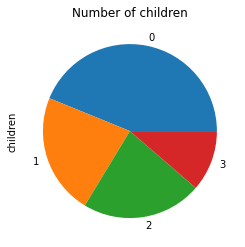

In [302]:
# discretizing children column

bankdf['children'].value_counts().plot(kind='pie')
plt.title('Number of children')

In [303]:
bankdf['children'].value_counts()

0    263
1    135
2    134
3     68
Name: children, dtype: int64

In [304]:
bankdf['children'].replace({0:'no',1:'1',2:'2',3:'3'}, inplace=True)

In [305]:
bankdf.children.value_counts()

no    263
1     135
2     134
3      68
Name: children, dtype: int64

In [306]:
bankdf.age.value_counts()

Forties      141
Twenties     123
Thirties     117
Fifties      100
Sixties       98
Teenagers     21
Name: age, dtype: int64

In [307]:
bankdf.income.value_counts()

Very_Low    150
Low         150
Medium      150
High        150
Name: income, dtype: int64

In [308]:
bankdf.set_index('id',inplace=True) # remving id

In [309]:
bankdf.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
id,,,,,,,,,,,
ID12101,Forties,FEMALE,INNER_CITY,Low,NO,1,NO,NO,NO,NO,YES
ID12102,Forties,MALE,TOWN,Medium,YES,3,YES,NO,YES,YES,NO
ID12103,Fifties,FEMALE,INNER_CITY,Very_Low,YES,no,YES,YES,YES,NO,NO
ID12104,Twenties,FEMALE,TOWN,Low,YES,3,NO,NO,YES,NO,NO
ID12105,Fifties,FEMALE,RURAL,High,YES,no,NO,YES,NO,NO,NO


# 3. Assoctiation Rule Mining (experimenting with support, confidence, and lift)

In [310]:
# apriori needs data to be onehot encoded
bankdata_oneHot = pd.get_dummies(bankdf)


In [311]:
bankdata_oneHot.head()

,age_Teenagers,age_Twenties,age_Thirties,age_Forties,age_Fifties,age_Sixties,sex_FEMALE,sex_MALE,region_INNER_CITY,region_RURAL,...,car_NO,car_YES,save_act_NO,save_act_YES,current_act_NO,current_act_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
id,,,,,,,,,,,,,,,,,,,,,
ID12101,0,0,0,1,0,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1
ID12102,0,0,0,1,0,0,0,1,0,0,...,0,1,1,0,0,1,0,1,1,0
ID12103,0,0,0,0,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,1,0
ID12104,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,1,0
ID12105,0,0,0,0,1,0,1,0,0,1,...,1,0,0,1,1,0,1,0,1,0


In [312]:
rules = apriori(bankdata_oneHot,min_support = 0.11,use_colnames=True)

In [313]:
association_rules(rules, metric="confidence", min_threshold=0.06)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(region_INNER_CITY),(age_Twenties),0.448333,0.205000,0.110000,0.245353,1.196845,0.018092,1.053473
1,(age_Twenties),(region_INNER_CITY),0.205000,0.448333,0.110000,0.536585,1.196845,0.018092,1.190439
2,(age_Twenties),(income_Very_Low),0.205000,0.250000,0.135000,0.658537,2.634146,0.083750,2.196429
3,(income_Very_Low),(age_Twenties),0.250000,0.205000,0.135000,0.540000,2.634146,0.083750,1.728261
4,(age_Twenties),(married_YES),0.205000,0.660000,0.130000,0.634146,0.960828,-0.005300,0.929333
...,...,...,...,...,...,...,...,...,...
4187,(pep_NO),"(mortgage_NO, current_act_YES, save_act_YES, m...",0.543333,0.236667,0.151667,0.279141,1.179469,0.023078,1.058922
4188,(married_YES),"(pep_NO, current_act_YES, save_act_YES, mortga...",0.660000,0.180000,0.151667,0.229798,1.276655,0.032867,1.064656
4189,(save_act_YES),"(pep_NO, mortgage_NO, current_act_YES, married...",0.690000,0.215000,0.151667,0.219807,1.022357,0.003317,1.006161
4190,(current_act_YES),"(pep_NO, mortgage_NO, save_act_YES, married_YES)",0.758333,0.200000,0.151667,0.200000,1.000000,0.000000,1.000000


In [314]:
association_rules(rules, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(region_INNER_CITY),(age_Twenties),0.448333,0.205000,0.110000,0.245353,1.196845,0.018092,1.053473
1,(age_Twenties),(region_INNER_CITY),0.205000,0.448333,0.110000,0.536585,1.196845,0.018092,1.190439
2,(age_Twenties),(income_Very_Low),0.205000,0.250000,0.135000,0.658537,2.634146,0.083750,2.196429
3,(income_Very_Low),(age_Twenties),0.250000,0.205000,0.135000,0.540000,2.634146,0.083750,1.728261
4,(age_Twenties),(car_NO),0.205000,0.506667,0.118333,0.577236,1.139281,0.014467,1.166923
...,...,...,...,...,...,...,...,...,...
2703,(pep_NO),"(mortgage_NO, current_act_YES, save_act_YES, m...",0.543333,0.236667,0.151667,0.279141,1.179469,0.023078,1.058922
2704,(married_YES),"(pep_NO, current_act_YES, save_act_YES, mortga...",0.660000,0.180000,0.151667,0.229798,1.276655,0.032867,1.064656
2705,(save_act_YES),"(pep_NO, mortgage_NO, current_act_YES, married...",0.690000,0.215000,0.151667,0.219807,1.022357,0.003317,1.006161
2706,(current_act_YES),"(pep_NO, mortgage_NO, save_act_YES, married_YES)",0.758333,0.200000,0.151667,0.200000,1.000000,0.000000,1.000000


# 4.Rules with PEP on the RHS

In [315]:
assoc_rules=association_rules(rules, metric="confidence", min_threshold=0.7)

In [316]:
assoc_lift=association_rules(rules, metric="lift", min_threshold=1)

In [317]:
assoc_rules[assoc_rules.consequents== {'pep_NO'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(income_Very_Low),(pep_NO),0.250000,0.543333,0.175000,0.700000,1.288344,0.039167,1.522222
118,"(income_Very_Low, married_YES)",(pep_NO),0.158333,0.543333,0.118333,0.747368,1.375525,0.032306,1.807639
120,"(save_act_YES, income_Very_Low)",(pep_NO),0.158333,0.543333,0.120000,0.757895,1.394898,0.033972,1.886232
156,"(children_no, married_YES)",(pep_NO),0.300000,0.543333,0.235000,0.783333,1.441718,0.072000,2.107692
194,"(children_no, save_act_YES)",(pep_NO),0.290000,0.543333,0.218333,0.752874,1.385657,0.060767,1.847907
237,"(children_no, married_YES, sex_FEMALE)",(pep_NO),0.156667,0.543333,0.130000,0.829787,1.527216,0.044878,2.682917
255,"(children_no, save_act_YES, sex_FEMALE)",(pep_NO),0.146667,0.543333,0.115000,0.784091,1.443112,0.035311,2.115088
333,"(car_NO, children_no, married_YES)",(pep_NO),0.166667,0.543333,0.133333,0.800000,1.472393,0.042778,2.283333
338,"(children_no, save_act_YES, married_YES)",(pep_NO),0.198333,0.543333,0.178333,0.899160,1.654895,0.070572,4.528611
343,"(children_no, current_act_YES, married_YES)",(pep_NO),0.221667,0.543333,0.175000,0.789474,1.453019,0.054561,2.169167


In [318]:
assoc_lift[assoc_lift.consequents == {'pep_NO'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(age_Twenties),(pep_NO),0.205000,0.543333,0.131667,0.642276,1.182104,0.020283,1.276591
12,(age_Thirties),(pep_NO),0.195000,0.543333,0.113333,0.581197,1.069687,0.007383,1.090408
29,(age_Forties),(pep_NO),0.235000,0.543333,0.128333,0.546099,1.005091,0.000650,1.006094
59,(sex_FEMALE),(pep_NO),0.500000,0.543333,0.283333,0.566667,1.042945,0.011667,1.053846
113,(region_TOWN),(pep_NO),0.288333,0.543333,0.170000,0.589595,1.085145,0.013339,1.112723
...,...,...,...,...,...,...,...,...,...
2532,"(mortgage_NO, children_no, save_act_YES, marri...",(pep_NO),0.133333,0.543333,0.121667,0.912500,1.679448,0.049222,5.219048
2562,"(mortgage_NO, children_no, current_act_YES, ma...",(pep_NO),0.146667,0.543333,0.133333,0.909091,1.673173,0.053644,5.023333
2597,"(mortgage_NO, car_NO, current_act_YES, married...",(pep_NO),0.173333,0.543333,0.110000,0.634615,1.168004,0.015822,1.249825
2653,"(car_YES, current_act_YES, save_act_YES, marri...",(pep_NO),0.178333,0.543333,0.110000,0.616822,1.135256,0.013106,1.191789


In [319]:
assoc_rules[assoc_rules.consequents== {'pep_YES'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(children_1),(pep_YES),0.225000,0.456667,0.183333,0.814815,1.784266,0.080583,2.934000
149,"(mortgage_NO, married_NO)",(pep_YES),0.216667,0.456667,0.153333,0.707692,1.549691,0.054389,1.858772
151,"(children_1, married_YES)",(pep_YES),0.148333,0.456667,0.123333,0.831461,1.820717,0.055594,3.223778
178,"(children_1, save_act_YES)",(pep_YES),0.158333,0.456667,0.133333,0.842105,1.844026,0.061028,3.441111
181,"(children_1, current_act_YES)",(pep_YES),0.168333,0.456667,0.140000,0.831683,1.821204,0.063128,3.228039
183,"(children_1, mortgage_NO)",(pep_YES),0.140000,0.456667,0.118333,0.845238,1.850886,0.054400,3.510769
327,"(mortgage_NO, married_NO, current_act_YES)",(pep_YES),0.170000,0.456667,0.121667,0.715686,1.567196,0.044033,1.911034


In [320]:
assoc_lift[assoc_lift.consequents== {'pep_YES'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
82,(sex_MALE),(pep_YES),0.500000,0.456667,0.240000,0.480000,1.051095,0.011667,1.044872
98,(region_INNER_CITY),(pep_YES),0.448333,0.456667,0.205000,0.457249,1.001275,0.000261,1.001073
130,(income_Low),(pep_YES),0.250000,0.456667,0.118333,0.473333,1.036496,0.004167,1.031646
136,(income_Medium),(pep_YES),0.250000,0.456667,0.120000,0.480000,1.051095,0.005833,1.044872
146,(income_High),(pep_YES),0.250000,0.456667,0.143333,0.573333,1.255474,0.029167,1.273438
156,(married_NO),(pep_YES),0.340000,0.456667,0.200000,0.588235,1.288106,0.044733,1.319524
174,(children_1),(pep_YES),0.225000,0.456667,0.183333,0.814815,1.784266,0.080583,2.934000
208,(car_YES),(pep_YES),0.493333,0.456667,0.230000,0.466216,1.020911,0.004711,1.017890
210,(save_act_NO),(pep_YES),0.310000,0.456667,0.158333,0.510753,1.118437,0.016767,1.110549
222,(current_act_YES),(pep_YES),0.758333,0.456667,0.351667,0.463736,1.015481,0.005361,1.013183
